In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('rottentomatoes_movies.csv')
df.head()

,Movie Name,Critics Score,Audience Score
0,Longlegs,86%,60%
1,Oddity,96%,79%
2,The Union,36%,23%
3,Borderlands,10%,53%
4,Ghostlight,100%,94%


In [6]:
# Let's convert those % values to numerical
df['Critics Score'] = df['Critics Score'].str.replace('%', '').astype(float)
df['Audience Score'] = df['Audience Score'].str.replace('%', '').astype(float)
df

,Movie Name,Critics Score,Audience Score
0,Longlegs,86.0,60.0
1,Oddity,96.0,79.0
2,The Union,36.0,23.0
3,Borderlands,10.0,53.0
4,Ghostlight,100.0,94.0
...,...,...,...
295,Ferrari,72.0,74.0
296,Titanic,88.0,69.0
297,It Comes at Night,88.0,44.0
298,The Nature of Love,92.0,80.0


In [7]:
df.isnull().sum()

Movie Name        0
Critics Score     4
Audience Score    6
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Movie Name        0
Critics Score     0
Audience Score    0
dtype: int64

In [10]:
len(df)

292

#### 1. Distribution of Critics and Audience Scores

In [18]:
# Histogram for Critics Score
fig_critics_hist = px.histogram(
    df, 
    x='Critics Score', 
    nbins=20, 
    title='Distribution of Critics Scores',
    labels={'Critics Score': 'Critics Score (%)'},
    color_discrete_sequence=['red']
)
fig_critics_hist.update_layout(
    xaxis_title='Critics Score (%)', 
    yaxis_title='Count'
)
fig_critics_hist.show()

In [19]:
# Histogram for Audience Score
fig_audience_hist = px.histogram(
    df, 
    x='Audience Score', 
    nbins=20, 
    title='Distribution of Audience Scores',
    labels={'Audience Score': 'Audience Score (%)'}
)
fig_audience_hist.update_layout(
    xaxis_title='Audience Score (%)', 
    yaxis_title='Count'
)
fig_audience_hist.show()

#### 2. Correlation Between Critics and Audience Scores

In [23]:
df['Score Category'] = np.where(
    (df['Critics Score'] + df['Audience Score']) / 2 < 50, 'Low',
    np.where((df['Critics Score'] + df['Audience Score']) / 2 > 75, 'High', 'Middle')
)
fig_scatter = px.scatter(df, x='Critics Score', y='Audience Score',
                         title='Critics Score vs. Audience Score',
                         labels={'Critics Score': 'Critics Score (%)', 'Audience Score': 'Audience Score (%)'},
                         hover_data=['Movie Name'],
                         color='Score Category',  # Color by the defined score category
                         color_discrete_map={
                            'Low': 'red',
                            'Middle': 'yellow',
                            'High': 'green'
                        })
fig_scatter.show()

#### 3. Top and Bottom Movies by Scores

In [25]:
top_critics = df.nlargest(10, 'Critics Score')
bottom_critics = df.nsmallest(10, 'Critics Score')
top_audience = df.nlargest(10, 'Audience Score')
bottom_audience = df.nsmallest(10, 'Audience Score')

fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(
    x=top_critics['Movie Name'],
    y=top_critics['Critics Score'],
    name='Top 10 by Critics Score',
    marker_color='green'
))

fig_bar.add_trace(go.Bar(
    x=bottom_critics['Movie Name'],
    y=bottom_critics['Critics Score'],
    name='Bottom 10 by Critics Score',
    marker_color='red'
))

fig_bar.update_layout(barmode='group', title='Top and Bottom Movies by Critics Score', xaxis_title='Movie Name', yaxis_title='Score (%)')
fig_bar.show()

fig_bar2 = go.Figure()

fig_bar2.add_trace(go.Bar(
    x=top_audience['Movie Name'],
    y=top_audience['Audience Score'],
    name='Top 10 by Audience Score',
    marker_color='blue'
))

fig_bar2.add_trace(go.Bar(
    x=bottom_audience['Movie Name'],
    y=bottom_audience['Audience Score'],
    name='Bottom 10 by Audience Score',
    marker_color='orange'
))

fig_bar2.update_layout(barmode='group', title='Top and Bottom Movies by Audience Score', xaxis_title='Movie Name', yaxis_title='Score (%)')
fig_bar2.show()

#### 4. Box Plot of Scores

In [27]:
fig_box = go.Figure()

fig_box.add_trace(go.Box(y=df['Critics Score'], name='Critics Score', boxmean=True, marker_color='purple'))
fig_box.add_trace(go.Box(y=df['Audience Score'], name='Audience Score', boxmean=True, marker_color='blue'))

fig_box.update_layout(title='Box Plot of Critics and Audience Scores', yaxis_title='Score (%)')
fig_box.show()

In [10]:
# scaler = StandardScaler()
# df[['Critics Score', 'Audience Score']] = scaler.fit_transform(df[['Critics Score', 'Audience Score']])
# df

,Movie Name,Critics Score,Audience Score
0,Longlegs,0.553977,-0.884950
1,Oddity,0.972397,0.161895
2,The Union,-1.538124,-2.923544
3,Borderlands,-2.626017,-1.270630
4,Ghostlight,1.139765,0.988352
...,...,...,...
295,Ferrari,-0.031811,-0.113591
296,Titanic,0.637661,-0.389076
297,It Comes at Night,0.637661,-1.766505
298,The Nature of Love,0.805029,0.216992


In [25]:
range_k = range(2, 11)
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=10)
    labels = kmeans.fit_predict(df[['Critics Score', 'Audience Score']])
    silhouette_avg = silhouette_score(df[['Critics Score', 'Audience Score']], labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n-clusters = {k}, the silhouette score is {silhouette_avg}')

For n-clusters = 2, the silhouette score is 0.5477029514838109
For n-clusters = 3, the silhouette score is 0.4520809764536417
For n-clusters = 4, the silhouette score is 0.46393390246084465
For n-clusters = 5, the silhouette score is 0.42185297441273917
For n-clusters = 6, the silhouette score is 0.421372914179362
For n-clusters = 7, the silhouette score is 0.40514907282259494
For n-clusters = 8, the silhouette score is 0.4167583409079371
For n-clusters = 9, the silhouette score is 0.3855765479463309
For n-clusters = 10, the silhouette score is 0.3613874691760888


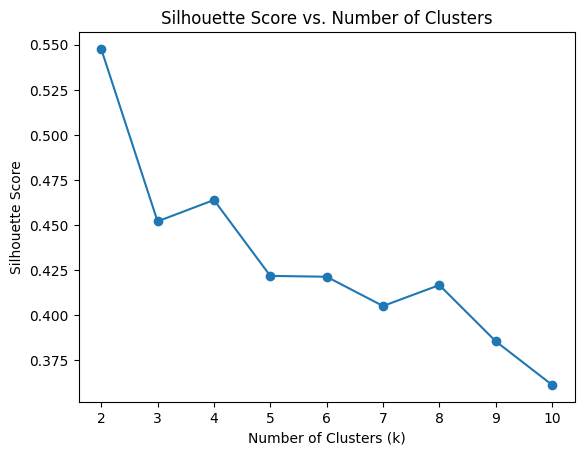

In [26]:
plt.plot(range_k, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [27]:
k = 2
kmeans = KMeans(n_clusters=k)
df['Cluster'] = kmeans.fit_predict(df[['Critics Score', 'Audience Score']])
df

,Movie Name,Critics Score,Audience Score,Cluster
0,Longlegs,86.0,60.0,0
1,Oddity,96.0,79.0,0
2,The Union,36.0,23.0,1
3,Borderlands,10.0,53.0,1
4,Ghostlight,100.0,94.0,0
...,...,...,...,...
295,Ferrari,72.0,74.0,0
296,Titanic,88.0,69.0,0
297,It Comes at Night,88.0,44.0,0
298,The Nature of Love,92.0,80.0,0


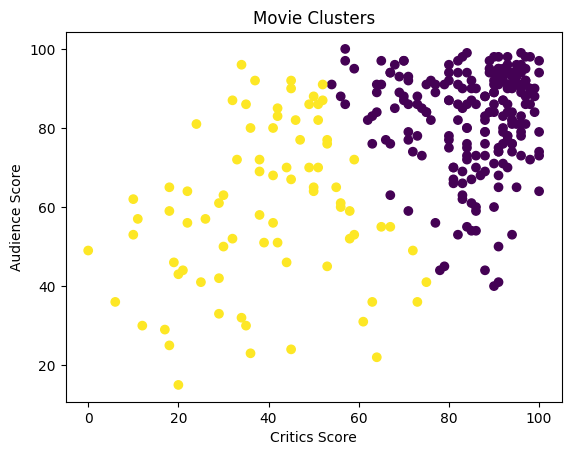

In [28]:
plt.scatter(df['Critics Score'], df['Audience Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Critics Score')
plt.ylabel('Audience Score')
plt.title('Movie Clusters')
plt.show()

In [30]:
fig = px.scatter(
    df,
    x='Critics Score',
    y='Audience Score',
    color='Cluster',
    hover_data=['Movie Name', 'Critics Score', 'Audience Score'],
    title='Movie Clusters',
    labels={'Critics Score': 'Critics Score (%)', 'Audience Score': 'Audience Score (%)'}
)

fig.update_layout(
    xaxis_title='Critics Score (%)',
    yaxis_title='Audience Score (%)',
    legend_title='Cluster'
)

fig.show()